In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('ggplot')

In [9]:
df_loc = pd.read_csv("data/volcanoes.txt", delimiter='\s', header=None, engine='python');

df_loc.columns = ["name", "long", "lat", "aperture"]

df_loc.head()

,name,long,lat,aperture
0,ambrym,168.12,-16.25,0.2
1,anatahan,145.67,16.35,0.2
2,aoba,167.83,-15.40,0.2
3,arenal,-84.71,10.46,0.2
4,asama,138.53,36.40,0.2


In [10]:
target = df_loc[df_loc.name == 'kilauea'].values.flatten()
data_dir = f"data/{target[0]}/"

In [11]:
df = pd.read_csv(data_dir+"data.csv", index_col=0)
df["datetime"] = pd.to_datetime(df["datetime"])
df.head()

,index,UNIX_Time,Sat,Year,Month,Day,Hour,Minute,Longitude,Latitude,...,SunZen,SunAzi,Line,Samp,Ratio,Glint,Excess,Temp,Err,datetime
0,71860,951512100,T,2000,2,25,20,55,-155.367538,19.778879,...,37.76,137.23,327,205,-0.58,75.460,57.119,276.8,5.6,2000-02-25 20:55:00
1,71859,951512100,T,2000,2,25,20,55,-155.351715,19.777077,...,37.76,137.25,327,206,-0.41,75.392,83.206,276.8,5.6,2000-02-25 20:55:00
2,71858,951557099,T,2000,2,26,9,25,-155.053894,19.342176,...,161.06,-59.89,1145,69,-0.79,137.327,11.860,289.2,5.9,2000-02-26 09:25:00
3,71855,951600899,T,2000,2,26,21,35,-155.027740,19.336313,...,31.05,151.53,1532,1148,-0.56,32.510,51.439,289.2,5.9,2000-02-26 21:35:00
4,71857,951600899,T,2000,2,26,21,35,-155.096741,19.372599,...,31.11,151.45,1530,1144,-0.26,32.356,114.117,288.4,4.7,2000-02-26 21:35:00


## Spatial and Temporal Data around Target

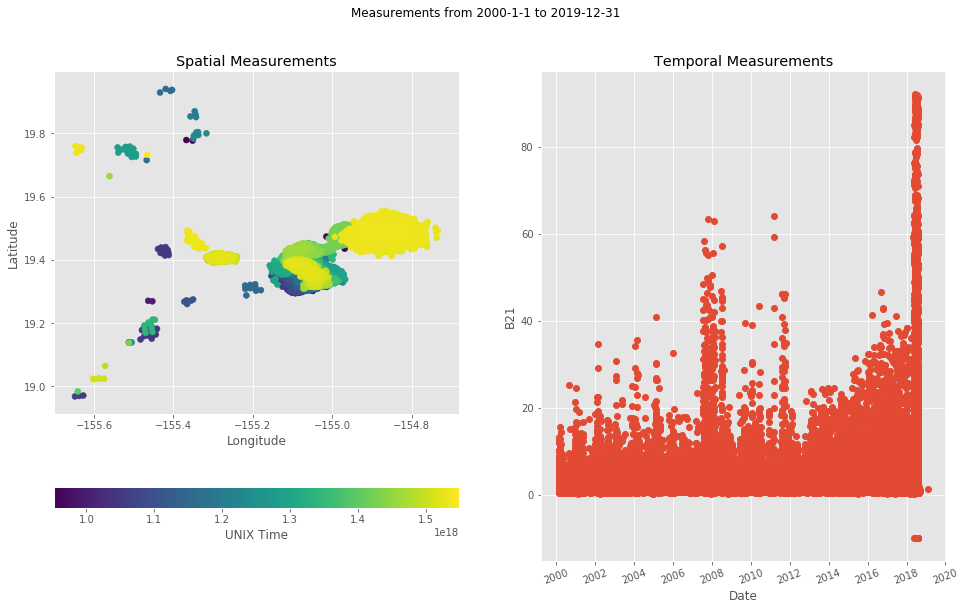

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16,9))

scatter = ax[0].scatter(df.Longitude, df.Latitude, c=df.datetime)#, cmap=plt.cm.autumn)
cbar = fig.colorbar(scatter, ax=ax[0], orientation='horizontal')
cbar.set_label('UNIX Time')

#ax[0].add_artist(plt.Circle(target[1:3], target[3]/2., color=]'k', fill=False))
ax[0].set_title("Spatial Measurements")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")

scatter = ax[1].plot_date(df.datetime, df.B21)

ax[1].set_title("Temporal Measurements")
ax[1].set_xlabel("Date")
plt.xticks(rotation=20)
ax[1].set_ylabel("B21")

fig.suptitle(f"Measurements from {df.Year.min()}-{df.Month.min()}-{df.Day.min()} to {df.Year.max()}-{df.Month.max()}-{df.Day.max()}")
plt.savefig(f"{data_dir}/spatial_temporal.png", bbox_inches='tight', dpi=300)

## Temperature Difference

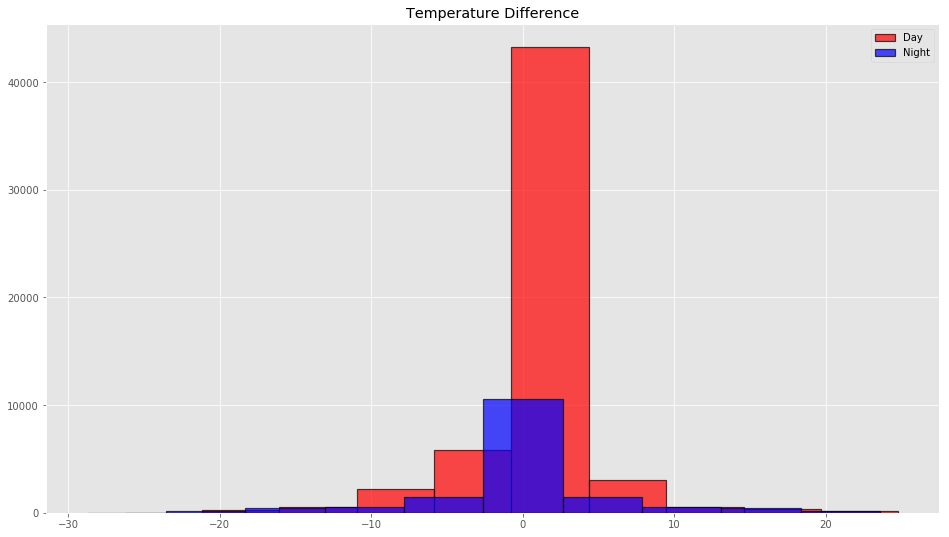

In [16]:
fig = plt.figure(figsize=(16, 9))
ax = plt.gca()

temp_diff_day = df["Temp"][df["Hour"].between(6, 18)].diff()
temp_diff_night = df["Temp"][~df["Hour"].between(6, 18)].diff()

day = ax.hist(temp_diff_day, color='r', label='Day', alpha=0.7, linewidth=1.2, edgecolor='k')
night = ax.hist(temp_diff_night, color='b', label='Night', alpha=0.7, linewidth=1.2, edgecolor='k')

ax.set_title("Temperature Difference")
plt.legend()
plt.show()